# Testing and regularization

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 21.52 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

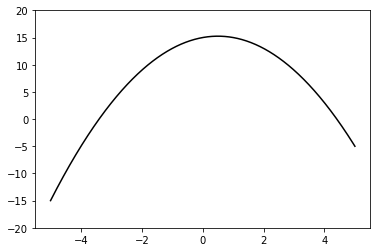

In [ ]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

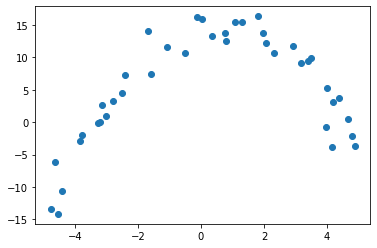

In [ ]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

In [ ]:
X=X.reshape(-1,1)
# Y=Y.reshape(-1,1)
print(X.shape)

(40, 1)


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    # print(poly)
    X = poly.fit_transform(X)
    return X
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly)

(40, 200)
[[ 3.44421852e+000  1.18626412e+001  4.08575284e+001 ...  2.20779131e+106
   7.60411570e+106  2.61902361e+107]
 [-2.41083250e+000  5.81211333e+000 -1.40120317e+001 ...  4.66738168e+075
  -1.12522754e+076  2.71273512e+076]
 [ 1.12747214e-001  1.27119342e-002  1.43323516e-003 ...  2.07468402e-188
   2.33914843e-189  2.63732468e-190]
 ...
 [-4.10175639e+000  1.68244055e+001 -6.90096126e+001 ...  2.33363484e+121
  -9.57200162e+121  3.92620188e+122]
 [ 2.57603922e+000  6.63597806e+000  1.70945397e+001 ...  2.33662605e+081
   6.01924036e+081  1.55057992e+082]
 [ 3.42460223e+000  1.17279004e+001  4.01633940e+001 ...  7.12535971e+105
   2.44015227e+106  8.35655093e+106]]


In [ ]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=.20)

In [ ]:
y_train.shape

(32,)

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from matplotlib.colors import Normalize
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)
# reg = LinearRegression(normalize=True).fit(X_train, y_train)

# print(reg.score(X_train, y_train))
# price_pred = reg.predict(X_test)
# print(price_pred)
model_no_reg = LinearRegression(normalize=True).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 0.010892204583052394
Testing error (rmse): 4809808.143063339


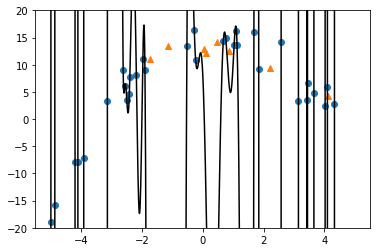

Polynomial coefficients
[8.35044050405561, -116.46465890775792, -946.5008630210864, -295.0298532879299, 9607.36574430267, 163.19016649120664, -31915.3190485738, 11519.410986686371, 38176.877475403744, -16912.56842182757, -24111.25838434205, 10408.79146888691, 9207.62061772411, -3486.3372993670973, -2215.678309364781, 689.8029159147164, 331.86102706908576, -81.39785889506462, -28.756506517221165, 5.303212921556568, 1.105489581694808, -0.12571473735813227, 0.012675190148813659, -0.0042349690217227355, -0.0016129728315082133, 0.00016415802089778914, -3.7276728618696776e-05, 7.620532901476721e-06, 1.3594618969739987e-06, -3.0566378339491075e-08, 9.735143582653901e-08, -1.1090467128023996e-08, 2.0944310875097904e-09, -4.1940383809598105e-10, -3.715199089032967e-11, -4.798353960949763e-12, -4.756058557766628e-12, 3.2462012437263405e-13, -2.0890159491219008e-13, 2.4820628929892097e-14, -5.630432322489315e-15, 1.0368938126403509e-15, -6.03365854108822e-17, 3.077264441092539e-17, 3.993415921875

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)
# c = linear_model.Lasso(alpha=0.1)
model_L1_reg = linear_model.Lasso(alpha=0.1)
model_L1_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.288e+01, tolerance: 2.490e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

Training error (rmse): 1.909335205473549
Testing error (rmse): 1.442597693897485


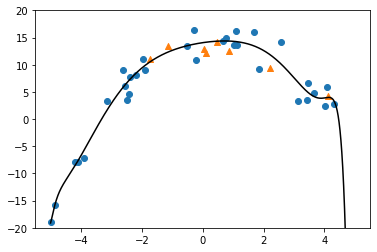

Polynomial coefficients
[14.058105460269042, 0.8302377098438338, -0.515989589349702, 0.0038542012762321125, -0.0666845602533545, -0.003454435882849361, 0.0009123886108000429, 0.00017616527174556148, 6.569339695499438e-05, 8.644521203061085e-06, 2.0577119453720218e-06, 2.1264465607205313e-07, 3.698505767740071e-08, 1.6361060722146509e-09, -2.1024337830260427e-10, -1.6495123894062072e-10, -5.6772216566834557e-11, -1.280399904191089e-11, -3.400407801991095e-12, -6.464427547245401e-13, -1.5552619094980985e-13, -2.7712158560428082e-14, -6.2926992576791594e-15, -1.0871674998428162e-15, -2.3716183928571347e-16, -4.032943410812039e-17, -8.533340583442789e-18, -1.4395758997146885e-18, -2.9718826114515913e-19, -4.9967125884717884e-20, -1.0103143429558417e-20, -1.6979354519878984e-21, -3.3713754445457644e-22, -5.675044329334451e-23, -1.1085254198668185e-23, -1.8718994161376884e-24, -3.601287888254531e-25, -6.108667489651357e-26, -1.158274103976816e-26, -1.976062509846095e-27, -3.693615260884171e-

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)
model_L2_reg = linear_model.Ridge(alpha=0.1,normalize=True)
model_L2_reg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.1, normalize=True)

Training error (rmse): 2.186644687467468
Testing error (rmse): 1.1980237797225042


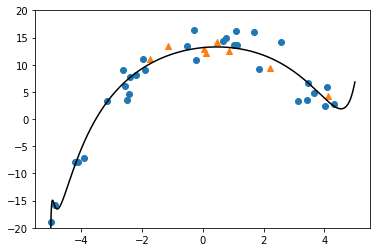

Polynomial coefficients
[13.147203894723587, 0.5523736557636261, -0.603798534149144, 0.013551969147966409, -0.013138639865283875, 0.000649652011884212, -0.00024129684944956145, 2.9049950905012906e-05, -3.0728134626499842e-06, 1.05909823925285e-06, 1.3085199122268233e-08, 3.3049167822859895e-08, 3.0274487578887987e-09, 9.121498990517528e-10, 1.5972221319779723e-10, 2.2126954998611217e-11, 6.73066629710108e-12, 4.3378439067966935e-13, 2.6105096883477045e-13, 4.013555863845907e-15, 9.766231668628533e-15, -2.1784795171600573e-16, 3.597437556845976e-16, -1.9091993428029794e-17, 1.3180665300878473e-17, -1.0381937106663652e-18, 4.828498208024944e-19, -4.8438124446480996e-20, 1.7730179488230063e-20, -2.0975663444957198e-21, 6.532495635693435e-22, -8.700347815966054e-23, 2.415302821578703e-23, -3.5111245725639345e-24, 8.958666181709895e-25, -1.390779039721856e-25, 3.331523126372086e-26, -5.4360147458139364e-27, 1.2413029973952095e-27, -2.1036912046811658e-28, 4.6307634987170277e-29, -8.07842944

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,4.130111,4.299534,1.360417e+07,3.993408,3.174074
1,-1.747956,11.091072,-4.611715e+02,10.465754,10.122464
2,0.112747,12.205789,-1.574182e+01,14.145148,13.201824
3,0.876171,12.574041,5.766994e+00,14.351442,13.169266
4,2.197047,9.366124,-2.792689e+04,11.900953,11.297035
5,0.046869,12.858476,8.284569e-01,14.095884,13.171768
6,-1.150989,13.436894,-5.351102e+03,12.304839,11.665844
7,0.474409,14.257854,-3.517417e+01,14.332809,13.274156
